In [1]:
import re

from collections import defaultdict
from conceptnet import ConceptNet
from dbpedia import DBPedia
import utils

wrap_cn = ConceptNet()
wrap_db = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

def snake_to_camel(text):
    return ''.join(x.capitalize() or '_' for x in text.split('_'))

In [2]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)

sink {('Sink', 'NaturalProcess', 'IsA'), ('NaturalProcess', 'Process', 'IsA')} {('Sink', 'Fixture', 'hypernym'), ('Sink', 'Agent', 'rfd:type')} set()
cellphone set() {('Telephone', 'Device', 'rfd:type'), ('Mobile_phone', 'Telephone', 'hypernym'), ('Telephone', 'Device', 'hypernym'), ('Mobile_phone', 'Company', 'rfd:type')} set()
rag {('PracticalJoke', 'Antic', 'IsA'), ('Week', 'TimePeriod', 'IsA'), ('Rag', 'PieceOfCloth', 'IsA'), ('PieceOfCloth', 'Fabric', 'IsA'), ('Rag', 'Week', 'IsA'), ('Rag', 'PracticalJoke', 'IsA')} set() set()
paperback set() {('Book', 'Set', 'hypernym'), ('Paperback', 'Book', 'rfd:type'), ('Paperback', 'Book', 'hypernym')} set()
cup {('Trophy', 'Award', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('Cup', 'Trophy', 'IsA'), ('Punch', 'MixedDrink', 'IsA'), ('Cup', 'Containerful', 'IsA'), ('Crockery', 'Tableware', 'IsA'), ('Hole', 'NaturalDepression', 'IsA'), ('Cup', 'Container', 'IsA'), ('Cup', 'Crockery', 'IsA'), ('Cup', 'PlantOrgan', 'IsA'), ('Hole', 'P

garbage {('Receptacle', 'Fitting', 'IsA'), ('Waste', 'Material', 'IsA'), ('Garbage', 'Waste', 'IsA'), ('Waste', 'Act', 'IsA'), ('Receptacle', 'Container', 'IsA'), ('Waste', 'Activity', 'IsA'), ('Receptacle', 'PlantPart', 'IsA'), ('Garbage', 'Receptacle', 'IsA')} {('Municipal_solid_waste', 'Type', 'hypernym')} set()
eyeglass set() {('Glasses', 'Devices', 'hypernym'), ('Glasses', 'Device', 'rfd:type')} set()
radio {('Radio', 'Broadcasting', 'IsA'), ('CommunicationSystem', 'Facility', 'IsA'), ('CommunicationSystem', 'System', 'IsA'), ('Broadcasting', 'Telecommunication', 'IsA'), ('Radio', 'CommunicationSystem', 'IsA')} {('Radio', 'Use', 'hypernym')} set()
knife {('Weapon', 'Persuasion', 'IsA'), ('EdgeTool', 'Cutter', 'IsA'), ('Knife', 'EdgeTool', 'IsA'), ('Weapon', 'Instrument', 'IsA'), ('Knife', 'Weapon', 'IsA')} {('Knife', 'Software', 'rfd:type'), ('Knife', 'Tool', 'hypernym')} set()
bottle {('Containerful', 'IndefiniteQuantity', 'IsA'), ('Vessel', 'Tube', 'IsA'), ('Vessel', 'Container'

yogurt {('Food', 'Solid', 'IsA'), ('Food', 'Content', 'IsA'), ('Food', 'Substance', 'IsA'), ('Yogurt', 'Food', 'IsA')} {('Yogurt', 'Food', 'hypernym'), ('Yogurt', 'Food', 'rfd:type')} {'Food'}
milk {('Milk', 'LiquidBodySubstance', 'IsA'), ('LiquidBodySubstance', 'BodySubstance', 'IsA'), ('Milk', 'Foodstuff', 'IsA'), ('Foodstuff', 'Food', 'IsA'), ('Milk', 'Nutriment', 'IsA')} set() set()
bed {('Foundation', 'Education', 'IsA'), ('Bed', 'Stratum', 'IsA'), ('Foundation', 'FinancialInstitution', 'IsA'), ('Plot', 'Scheme', 'IsA'), ('Foundation', 'Support', 'IsA'), ('Surface', 'Aspect', 'IsA'), ('Bed', 'Surface', 'IsA'), ('NaturalDepression', 'GeologicalFormation', 'IsA'), ('Surface', 'Boundary', 'IsA'), ('Plot', 'Tract', 'IsA'), ('Bed', 'NaturalDepression', 'IsA'), ('Plot', 'Chart', 'IsA'), ('Plot', 'Story', 'IsA'), ('Bed', 'Foundation', 'IsA'), ('Surface', 'Layer', 'IsA'), ('Bed', 'Plot', 'IsA'), ('Surface', 'Artifact', 'IsA'), ('Foundation', 'Relation', 'IsA'), ('Stratum', 'Subpopulation'

postcard set() {('Postcard', 'MusicalWork', 'rfd:type'), ('Postcard', 'Piece', 'hypernym')} set()
bread {('Bread', 'BakedGoods', 'IsA'), ('BakedGoods', 'Food', 'IsA'), ('Bread', 'Starches', 'IsA'), ('Starches', 'Foodstuff', 'IsA')} {('Bread', 'Food', 'rfd:type'), ('Bread', 'Food', 'hypernym')} {'Food'}
tablecloth {('Tablecloth', 'TableLinen', 'IsA'), ('TableLinen', 'Linen', 'IsA')} {('Tablecloth', 'Cloth', 'hypernym'), ('Tablecloth', 'Fashion', 'rfd:type')} set()
pack {('AnimalGroup', 'BiologicalGroup', 'IsA'), ('Pack', 'Collection', 'IsA'), ('Pack', 'Bundle', 'IsA'), ('Corrective', 'Device', 'IsA'), ('Collection', 'Publication', 'IsA'), ('Pack', 'Package', 'IsA'), ('Package', 'Container', 'IsA'), ('Pack', 'AnimalGroup', 'IsA'), ('Pack', 'Corrective', 'IsA'), ('Collection', 'Group', 'IsA')} set() set()
pasta {('Food', 'Solid', 'IsA'), ('Pasta', 'Food', 'IsA'), ('Dish', 'Crockery', 'IsA'), ('Food', 'Content', 'IsA'), ('Food', 'Substance', 'IsA'), ('Dish', 'Container', 'IsA'), ('Dish', '

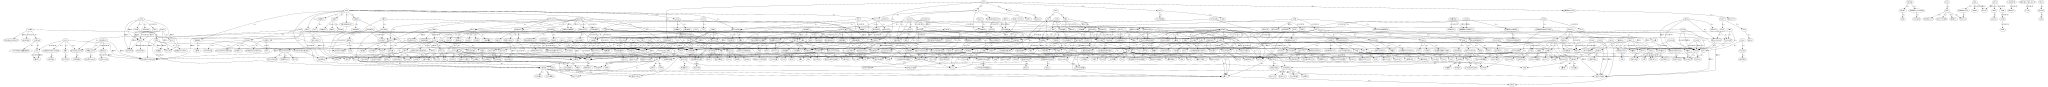

In [3]:
all_hypernyms = defaultdict(lambda: 0)
both_hypernyms = defaultdict(lambda: 0)
all_edges = set()
#both_edges = set()
for w in frame_lemmas:
    id_cn = wrap_cn.get_id(w)
    hypernyms_cn, edges_cn = wrap_cn.get_isa_tree(id_cn)
    hypernyms_cn = set([snake_to_camel(wrap_cn.get_name(el)) for el in hypernyms_cn])
    edges_cn = graph_utils.edges_name_normalize(edges_cn, lambda a: snake_to_camel(wrap_cn.get_name(a)))
    id_db = wrap_db.get_id(w)
    hypernyms_db, edges_db = wrap_db.get_all_types(id_db)
    hypernyms_db = set([wrap_db.get_name(el) for el in hypernyms_db])
    edges_db = graph_utils.edges_name_normalize(edges_db, wrap_db.get_name)
    hypernyms = hypernyms_cn.union(hypernyms_db)
    hypernyms_both = hypernyms_cn & hypernyms_db
    edges = edges_cn.union(edges_db)
    #edges_both = set([(e1[0], e1[1], '+'.join(e1[2], e2[2])) for e1 in edges_cn for e2 in edges_db if (e1[0] == e2[0] and e1[1] == e2[1])]) #edges_cn & edges_db
    for h in hypernyms:
        all_hypernyms[h] += 1
    for h in hypernyms_both:
        both_hypernyms[h] +=1
    print(w, edges_cn, edges_db, hypernyms_both)
    all_edges.update(edges)
    #both_edges.update(edges_both)

graph_utils.create_graph(all_edges)

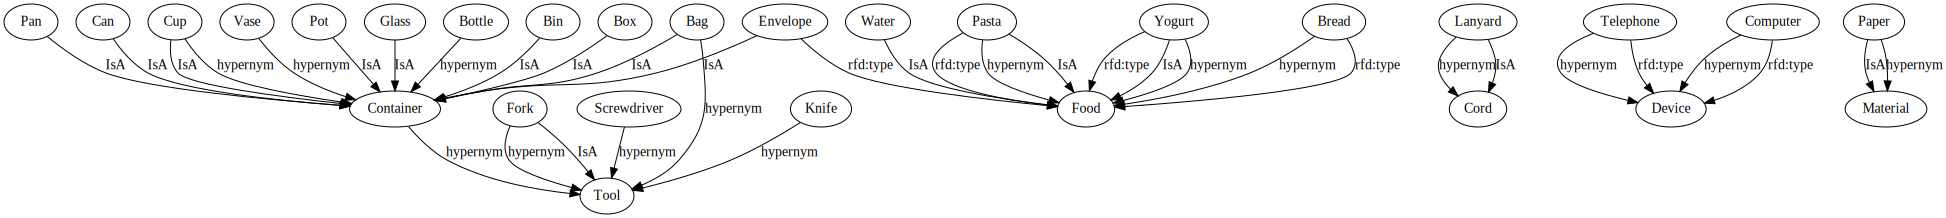

In [4]:
#graph_utils.create_graph(both_edges)
# the graph with edges that belong to both the sets of hypernyms
initial_nodes = [snake_to_camel(el) for el in frame_lemmas]
edges_with_nodes_both = set([e for e in all_edges if (e[0] in initial_nodes + list(both_hypernyms) and e[1] in both_hypernyms)])
graph_utils.create_graph(edges_with_nodes_both)